# Code Start

In [1]:
import numpy as np
import pandas as pd

from urllib.request import urlopen

import scipy.optimize
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
def parseData(fname):
  for l in open(fname):
    yield eval(l)

In [3]:
#Parses the fantasy json file
parsed_fan = list(parseData("fantasy_10000.json"))

# Problem 1

In [4]:
#Retrieves the review length and ratings from the parsed text
review_len = [len(d['review_text']) for d in parsed_fan]
ratings = [d['rating'] for d in parsed_fan]

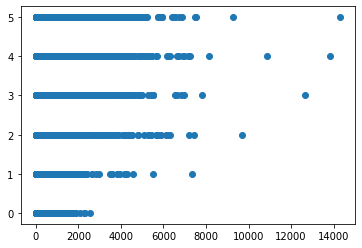

In [5]:
#Plots the review length against ratings as a scatter
plt.scatter(review_len,ratings)

{'0 Stars': 326,
 '1 Stars': 286,
 '2 Stars': 778,
 '3 Stars': 2113,
 '4 Stars': 3265,
 '5 Stars': 3232}

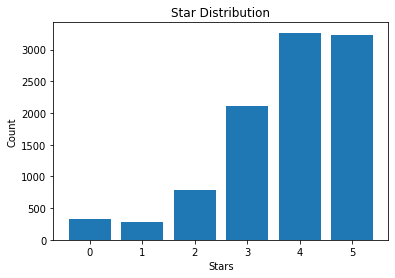

In [6]:
#Counts the amount of each star rating
zero = ratings.count(0)
one = ratings.count(1)
two = ratings.count(2)
three = ratings.count(3)
four = ratings.count(4)
five = ratings.count(5)

#Plots the amount of star ratings against their respective counts
plt.bar([0,1,2,3,4,5],[zero,one,two,three,four,five])
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Star Distribution')
{'0 Stars':zero,'1 Stars':one,'2 Stars':two,'3 Stars':three,'4 Stars':four,'5 Stars':five}

# Problem 2

In [7]:
#Uses sklearn to train a Linear Regression Model to obtain the intercept and coefficient values
inter = LinearRegression().fit(np.array(review_len).reshape(-1, 1), np.array(ratings).reshape(-1, 1)).intercept_
coef = LinearRegression().fit(np.array(review_len).reshape(-1, 1), np.array(ratings).reshape(-1, 1)).coef_

#Uses the intercept and coefficient values to create predictions and calculate the mean squared error
pred = inter + ([coef[0][0]*x for x in review_len])
mse = (sum((ratings - pred)**2))/len(pred)
{'Theta 0': inter[0], 'Theta 1': coef[0][0], 'Mean Squared Error': mse}

{'Theta 0': 3.685681355016952,
 'Theta 1': 6.873716748962768e-05,
 'Mean Squared Error': 1.5522086622355349}

# Problem 3

In [8]:
#Uses sklearn to train a Linear Regression Model to obtain the intercept and coefficient values
comments = [d['n_comments'] for d in parsed_fan]
inter2D = LinearRegression().fit(np.array([review_len,comments]).T, np.array(ratings).reshape(-1, 1)).intercept_
coef2D = LinearRegression().fit(np.array([review_len,comments]).T, np.array(ratings).reshape(-1, 1)).coef_

#Uses the intercept and coefficient values to create predictions and calculate the mean squared error
pred2D = inter2D + ([coef2D[0][0]*x for x in review_len]) + ([coef2D[0][1]*x for x in comments])
mse2D = (sum((ratings - pred2D)**2))/len(pred2D)
{'Theta 0': inter2D[0], 'Theta 1': coef2D[0][0],'Theta 2': coef2D[0][1], 'Mean Squared Error': mse2D}

{'Theta 0': 3.689167374290135,
 'Theta 1': 7.584074903973375e-05,
 'Theta 2': -0.03279289354454786,
 'Mean Squared Error': 1.5498351692774623}

The coefficient for Theta 1 in this model is different than the coefficient for Theta 1 in question 2, because this model has a second feature variable. This second feature variable gives the model a better understanding of how to predict ratings, and as such adjusted the coefficient of Theta 1 to a better value in order to reduce the Mean Squared Error.

# Problem 4

In [9]:
#Rescales review length feature by dividing every value by the largest review length
divided_review = [x/max(review_len) for x in review_len]
divided_review2 = [x**2 for x in divided_review]
divided_review3 = [x**3 for x in divided_review]
divided_review4 = [x**4 for x in divided_review]
divided_review5 = [x**5 for x in divided_review]

In [10]:
#Uses sklearn to train a 5 different Linear Regression Models of different degrees
firDeMo = LinearRegression().fit(np.array(divided_review).reshape(-1, 1), np.array(ratings).reshape(-1, 1))
seDeMo = LinearRegression().fit(np.array([divided_review,divided_review2]).T, np.array(ratings).reshape(-1, 1))
thDeMo = LinearRegression().fit(np.array([divided_review,divided_review2,divided_review3]).T, np.array(ratings).reshape(-1, 1))
foDeMo = LinearRegression().fit(np.array([divided_review,divided_review2,divided_review3,divided_review4]).T, np.array(ratings).reshape(-1, 1))
fiDeMo = LinearRegression().fit(np.array([divided_review,divided_review2,divided_review3,divided_review4,divided_review5]).T, np.array(ratings).reshape(-1, 1))

#Uses the trained Linear Regression Models to obtain the intercepts
firDeIn = firDeMo.intercept_
seDeIn = seDeMo.intercept_
thDeIn = thDeMo.intercept_
foDeIn = foDeMo.intercept_
fiDeIn = fiDeMo.intercept_

#Uses the trained Linear Regression Models to obtain the coefficients
firDeCo = firDeMo.coef_
seDeCo = seDeMo.coef_
thDeCo = thDeMo.coef_
foDeCo = foDeMo.coef_
fiDeCo = fiDeMo.coef_

In [11]:
#Uses the intercept and coefficient values of all the models to create predictions
predFir = firDeIn + ([firDeCo[0][0]*x for x in divided_review])
predSe = seDeIn + ([seDeCo[0][0]*x for x in divided_review]) + ([seDeCo[0][1]*x for x in divided_review2])
predTh = thDeIn + ([thDeCo[0][0]*x for x in divided_review]) + ([thDeCo[0][1]*x for x in divided_review2]) + ([thDeCo[0][2]*x for x in divided_review3])
predFo = foDeIn + ([foDeCo[0][0]*x for x in divided_review]) + ([foDeCo[0][1]*x for x in divided_review2]) + ([foDeCo[0][2]*x for x in divided_review3]) + ([foDeCo[0][3]*x for x in divided_review4])
predFi = fiDeIn + ([fiDeCo[0][0]*x for x in divided_review]) + ([fiDeCo[0][1]*x for x in divided_review2]) + ([fiDeCo[0][2]*x for x in divided_review3]) + ([fiDeCo[0][3]*x for x in divided_review4]) + ([fiDeCo[0][4]*x for x in divided_review5])

In [12]:
#Uses the predictions from all models to calculate the mean squared error
mseFir = (sum((ratings - predFir)**2))/len(predFir)
mseSe = (sum((ratings - predSe)**2))/len(predSe)
mseTh = (sum((ratings - predTh)**2))/len(predTh)
mseFo = (sum((ratings - predFo)**2))/len(predFo)
mseFi = (sum((ratings - predFi)**2))/len(predFi)

In [13]:
{'MSE Degree 1':mseFir,'MSE Degree 2':mseSe,'MSE Degree 3':mseTh,'MSE Degree 4':mseFo,'MSE Degree 5':mseFi}

{'MSE Degree 1': 1.5522086622355349,
 'MSE Degree 2': 1.5506567696339435,
 'MSE Degree 3': 1.5497985323805485,
 'MSE Degree 4': 1.5496291324524716,
 'MSE Degree 5': 1.5496142023298654}

# Problem 5

In [14]:
#Splits the rescaled review length data randomly in half
x_train, x_test, y_train, y_test = train_test_split(divided_review, ratings, test_size=0.5)
x_train2, x_test2, y_train2, y_test2 = train_test_split(divided_review2, ratings, test_size=0.5)
x_train3, x_test3, y_train3, y_test3 = train_test_split(divided_review3, ratings, test_size=0.5)
x_train4, x_test4, y_train4, y_test4 = train_test_split(divided_review4, ratings, test_size=0.5)
x_train5, x_test5, y_train5, y_test5 = train_test_split(divided_review5, ratings, test_size=0.5)

In [15]:
#Uses sklearn to train a 5 different Linear Regression Models of different degrees using the training set
firDeTr = LinearRegression().fit(np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
seDeTr = LinearRegression().fit(np.array([x_train,x_train2]).T, np.array(y_train2).reshape(-1, 1))
thDeTr = LinearRegression().fit(np.array([x_train,x_train2,x_train3]).T, np.array(y_train3).reshape(-1, 1))
foDeTr = LinearRegression().fit(np.array([x_train,x_train2,x_train3,x_train4]).T, np.array(y_train4).reshape(-1, 1))
fiDeTr = LinearRegression().fit(np.array([x_train,x_train2,x_train3,x_train4,x_train5]).T, np.array(y_train5).reshape(-1, 1))

#Uses the trained Linear Regression Models to obtain the intercept
firIn = firDeTr.intercept_
seIn = seDeTr.intercept_
thIn = thDeTr.intercept_
foIn = foDeTr.intercept_
fiIn = fiDeTr.intercept_

#Uses the trained Linear Regression Models to obtain the coefficients
firCo = firDeTr.coef_
seCo = seDeTr.coef_
thCo = thDeTr.coef_
foCo = foDeTr.coef_
fiCo = fiDeTr.coef_

In [16]:
#Uses the intercept and coefficient values to create predictions for the training set
predFirTr = firIn + ([firCo[0][0]*x for x in x_train])
predSeTr = seIn + ([seCo[0][0]*x for x in x_train]) + ([seCo[0][1]*x for x in x_train2])
predThTr = thIn + ([thCo[0][0]*x for x in x_train]) + ([thCo[0][1]*x for x in x_train2]) + ([thCo[0][2]*x for x in x_train3])
predFoTr = foIn + ([foCo[0][0]*x for x in x_train]) + ([foCo[0][1]*x for x in x_train2]) + ([foCo[0][2]*x for x in x_train3]) + ([foCo[0][3]*x for x in x_train4])
predFiTr = fiIn + ([fiCo[0][0]*x for x in x_train]) + ([fiCo[0][1]*x for x in x_train2]) + ([fiCo[0][2]*x for x in x_train3]) + ([fiCo[0][3]*x for x in x_train4]) + ([fiCo[0][4]*x for x in x_train5])

In [17]:
#Uses the training predictions to calculate the mean squared error for the training set
mseFirTr = (sum((y_train - predFirTr)**2))/len(predFirTr)
mseSeTr = (sum((y_train2 - predSeTr)**2))/len(predSeTr)
mseThTr = (sum((y_train3 - predThTr)**2))/len(predThTr)
mseFoTr = (sum((y_train4 - predFoTr)**2))/len(predFoTr)
mseFiTr = (sum((y_train5 - predFiTr)**2))/len(predFiTr)

In [18]:
#Uses the intercept and coefficient values to create predictions for the test set
predFirTe = firIn + ([firCo[0][0]*x for x in x_test])
predSeTe = seIn + ([seCo[0][0]*x for x in x_test]) + ([seCo[0][1]*x for x in x_test2])
predThTe = thIn + ([thCo[0][0]*x for x in x_test]) + ([thCo[0][1]*x for x in x_test2]) + ([thCo[0][2]*x for x in x_test3])
predFoTe = foIn + ([foCo[0][0]*x for x in x_test]) + ([foCo[0][1]*x for x in x_test2]) + ([foCo[0][2]*x for x in x_test3]) + ([foCo[0][3]*x for x in x_test4])
predFiTe = fiIn + ([fiCo[0][0]*x for x in x_test]) + ([fiCo[0][1]*x for x in x_test2]) + ([fiCo[0][2]*x for x in x_test3]) + ([fiCo[0][3]*x for x in x_test4]) + ([fiCo[0][4]*x for x in x_test5])

In [19]:
#Uses the test predictions to calculate the mean squared error for the test set
mseFirTe = (sum((y_test - predFirTe)**2))/len(predFirTe)
mseSeTe = (sum((y_test2 - predSeTe)**2))/len(predSeTe)
mseThTe = (sum((y_test3 - predThTe)**2))/len(predThTe)
mseFoTe = (sum((y_test4 - predFoTe)**2))/len(predFoTe)
mseFiTe = (sum((y_test5 - predFiTe)**2))/len(predFiTe)

In [20]:
{'MSE Train Degree 1':mseFirTr,'MSE Train Degree 2':mseSeTr,'MSE Train Degree 3':mseThTr,\
       'MSE Train Degree 4':mseFoTr,'MSE Train Degree 5':mseFiTr}

{'MSE Train Degree 1': 1.5702140380107583,
 'MSE Train Degree 2': 1.5413548976854232,
 'MSE Train Degree 3': 1.5354764783374562,
 'MSE Train Degree 4': 1.559401208110402,
 'MSE Train Degree 5': 1.5772604520589921}

In [21]:
{'MSE Test Degree 1':mseFirTe,'MSE Test Degree 2':mseSeTe,'MSE Test Degree 3':mseThTe,\
       'MSE Test Degree 4':mseFoTe,'MSE Test Degree 5':mseFiTe}

{'MSE Test Degree 1': 1.534597784842971,
 'MSE Test Degree 2': 1.5711500890936245,
 'MSE Test Degree 3': 1.5805766100838834,
 'MSE Test Degree 4': 1.5558378839936766,
 'MSE Test Degree 5': 1.5334510048416972}

# Problem 7

In [22]:
#Parses the beer data
parsed_beer = list(parseData("beer_50000.json"))

In [23]:
#Keeps only data where user specifies gender
with_gender = [d for d in parsed_beer if 'user/gender' in d.keys()]

In [24]:
#Retrieves the beer review length data and the gender data
beer_len = [len(d['review/text']) for d in with_gender]
#genders = [d['user/gender'] for d in with_gender]
genders = [1 if d['user/gender'] == 'Female' else 0 for d in with_gender]

In [25]:
#Trains a logistic regression model with beer review length to predict gender
clf = LogisticRegression().fit(np.array(beer_len).reshape(-1,1), np.array(genders))

C:\Users\afong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
#Predictions for the gender given beer review lengths
pred_LR = clf.predict(np.array(beer_len).reshape(-1,1))

In [27]:
#Finds the True Positive, False Positive, True Negative, and False Negative array values
TP_ = np.logical_and(pred_LR, genders)
FP_ = np.logical_and(pred_LR, np.logical_not(genders))
TN_ = np.logical_and(np.logical_not(pred_LR), np.logical_not(genders))
FN_ = np.logical_and(np.logical_not(pred_LR), genders)

#Finds the number of True Positive, False Positive, True Negative, and False Negative
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)

#Converts To Rates
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(FN+TP)

# accuracy
#sum(correct) / len(correct)
#(TP + TN) / (TP + FP + TN + FN)

#Calculates Balanced Error Rate
ber = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))

In [28]:
{'True Positive':TPR,'False Positive':FPR,'True Negative':TNR,'False Negative':FNR,'BER':ber}

{'True Positive': 0.0,
 'False Positive': 0.0,
 'True Negative': 1.0,
 'False Negative': 1.0,
 'BER': 0.5}

# Problem 8

In [29]:
#Trains a balanced logistic regression model with beer review length to predict gender
clf_bal = LogisticRegression(class_weight='balanced').fit(np.array(beer_len).reshape(-1,1), np.array(genders))

C:\Users\afong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
#Predictions for the gender given beer review lengths
pred_LRB = clf_bal.predict(np.array(beer_len).reshape(-1,1))

In [31]:
#Finds the True Positive, False Positive, True Negative, and False Negative array values
TP_bal = np.logical_and(pred_LRB, genders)
FP_bal = np.logical_and(pred_LRB, np.logical_not(genders))
TN_bal = np.logical_and(np.logical_not(pred_LRB), np.logical_not(genders))
FN_bal = np.logical_and(np.logical_not(pred_LRB), genders)

#Finds the number of True Positive, False Positive, True Negative, and False Negative
TP_B = sum(TP_bal)
FP_B = sum(FP_bal)
TN_B = sum(TN_bal)
FN_B = sum(FN_bal)

#Converts To Rates
TPR_B = TP_B/(TP_B+FN_B)
FPR_B = FP_B/(FP_B+TN_B)
TNR_B = TN_B/(TN_B+FP_B)
FNR_B = FN_B/(FN_B+TP_B)

# accuracy
#sum(correct) / len(correct)
#(TP + TN) / (TP + FP + TN + FN)

#Calculates Balanced Error Rate
ber_bal = 1 - 0.5 * (TP_B / (TP_B + FN_B) + TN_B / (TN_B + FP_B))

In [32]:
{'True Positive':TPR_B,'False Positive':FPR_B,'True Negative':TNR_B,'False Negative':FNR_B,'BER':ber_bal}

{'True Positive': 0.6461038961038961,
 'False Positive': 0.5795969146553869,
 'True Negative': 0.42040308534461307,
 'False Negative': 0.3538961038961039,
 'BER': 0.46674650927574546}

# Problem 9

I tested a variety of different features to be included in the improved model to lower BER, but the most successful combination I found was using beer/brewerID, review/overall, user/profileName, beer/ABV, and review/taste. I decided on these features because of how I thought female or male gendered drinkers would react to them. I thought since the data was so heavily biased towards male reviewers perhaps they would leave higher reviews and overall and for taste. This might be because they are more experienced with beers and are able to appreciate it more. They might also choose certain beers based on brand or alcohol content that inexperienced drinkers would not know to do by. I also expected that there would be slight deviations between male and female usernames. This thought process is what steered me towards these features.

In [33]:
#Created lists for the different features that would be used in this improved logistic regression model
brewID = [int(d['beer/brewerId']) for d in with_gender]
reviewO = [d['review/overall'] for d in with_gender]
profile = [len(d['user/profileName']) for d in with_gender]
#beerStyle = [len(d['beer/style']) for d in with_gender]
#aroma = [d['review/aroma'] for d in with_gender]
abv = [d['beer/ABV'] for d in with_gender]
taste = [d['review/taste'] for d in with_gender]
#palate = [d['review/palate'] for d in with_gender]
#appear = [d['review/appearance'] for d in with_gender]

In [34]:
#Trains a balanced logistic regression model to predict gender
improved_clf = LogisticRegression(class_weight='balanced')\
               .fit(np.array([beer_len,brewID,reviewO,profile,abv,taste]).T, np.array(genders))

C:\Users\afong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
#Predictions for the gender
impPred = improved_clf.predict(np.array([beer_len,brewID,reviewO,profile,abv,taste]).T)

In [36]:
#Finds the True Positive, False Positive, True Negative, and False Negative array values
TP_imp = np.logical_and(impPred, genders)
FP_imp = np.logical_and(impPred, np.logical_not(genders))
TN_imp = np.logical_and(np.logical_not(impPred), np.logical_not(genders))
FN_imp = np.logical_and(np.logical_not(impPred), genders)

#Finds the number of True Positive, False Positive, True Negative, and False Negative
TP_I = sum(TP_imp)
FP_I = sum(FP_imp)
TN_I = sum(TN_imp)
FN_I = sum(FN_imp)

#Converts To Rates
TPR_I = TP_I/(TP_I+FN_I)
FPR_I = FP_I/(FP_I+TN_I)
TNR_I = TN_I/(TN_I+FP_I)
FNR_I = FN_I/(FN_I+TP_I)

# accuracy
#sum(correct) / len(correct)
#(TP + TN) / (TP + FP + TN + FN)

#Calculates Balanced Error Rate
ber_imp = 1 - 0.5 * (TP_I / (TP_I + FN_I) + TN_I / (TN_I + FP_I))

In [37]:
{'True Positive':TPR_I,'False Positive':FPR_I,'True Negative':TNR_I,'False Negative':FNR_I,'BER':ber_imp}

{'True Positive': 0.6201298701298701,
 'False Positive': 0.4988803184871859,
 'True Negative': 0.5011196815128142,
 'False Negative': 0.37987012987012986,
 'BER': 0.43937522417865793}